# **Sentiment Analysis of Google Play Store Apps Reviews**


## **Objectives**


In this project we are going to:


*   Understand the theory behind sentiment analysis, including feature extraction from text (bag-of-words), and tokenizing\
    text (count vectorizer and term frequency-inverse document frequency)
*   Explore the Yelp Business Reviews dataset to perform text cleaning and vectorization
*   Build Word Count and Word Cloud plots to extract some meaning from the sentiments
*   Create a model to classify positive and negative reviews with Multinomial Naive Bayes Classifier, which is frequently used in the Natural Language Processing, as well as test your predictions


## **Introduction**


**Sentiment analysis** is the process of computationally identifying and categorizing opinions expressed in a piece of text.  It uses Natural Language Processing (NLP), machine learning, and other data analysis techniques to identify and categorize these opinions.

Sentiment analysis is often used by businesses to gain insight into how their customers feel about their product or service. With that feedback, they can make decisions to improve their customers’ experience.

In this project we will use customer reviews from the yelp database. **Yelp** is a local business directory service and review site with social networking features. It allows users to give ratings and review businesses. The review is usually short text consisting of few lines with about hundred words. Often, a review describes various dimensions about a business and the experience of a user with respect to those dimensions.


### **How Does Sentiment Analysis Work?**


Sentiment analysis algorithms fall into one of the three categories: **rule-based**, where the systems automatically perform sentiment analysis based on the pre-set rules (eg. various NLP techniques like stemming, tokenization, parsing etc.); **automatic**, where the systems rely on machine learning to learn from data, and **hybrid** systems combine both techniques.  In this project we will use machine learning classifier to work with our data.
The basic principle of sentiment analysis is described in the diagram below.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/Classifier_Algorithm-2.png)


In the **Training Phase**, the feature extractor transfers the text input into feature vectors. Then, the classifier algorithm learns to associate the training text to the corresponding output (eg. label) based on the training data. Pairs of feature vectors and labels are fed into the machine learning algorithm to generate a model.  In the **Prediction Phase**, the feature extractor is used to transform the new document into feature vectors.  These vectors are then fed into the model, which generates predicted labels, in other words, it performs classification.


#### **Feature Extraction from Text**


Machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array, where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our text into vector representations. This process is called **feature extraction**, or **vectorization**, and it is an essential first step in language analysis.

Some of the common sentiment encoding approaches are *Bag-of-Words (BOW)*, *Bag-of-Ngrams*, and *Word Embeddings* (also known as word vectors).  To vectorize a corpus (collection of written text) with a bag-of-words approach, we represent every document from the corpus, as a vector, whose length is equal to the vocabulary of the corpus. The computation can be further simplified by sorting token positions of the vector into alphabetical order, as shown in the diagram below. Alternatively, we can keep a dictionary that maps tokens to vector positions. Either way, we arrive at a vector mapping of the corpus that enables us to uniquely represent every document. This article, ["A Gentle Introduction to the Bag-of-Words Model” ](https://machinelearningmastery.com/gentle-introduction-bag-words-model/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsclassificationofyelprestaurantreviewsusingsentimentanalysis29854152-2022-01-01) contains more information about the *Bag-of-Words* approach.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/CountVectorizer.png)


#### **Tokenizing text with scikit-learn**


To perform feature extraction and vectorization, we first need to tokezine the text.  **Tokenization** is the process of converting text into tokens before transforming it into vectors.  There are many ways to tokenize text, some of them are included in various python libraries. In this guided project, we will use `*CountVectorizer()*` and `TfidfTransformer()` from `scikit-learn` library to tokenize/ vectorize our text.

`CountVectorizer()` can be imported from the `sklearn.feature_extraction model`.  It has its own internal pre-processing, tokenization and normalization methods. It is used to transform a given text into a vector on the basis of the frequency count of each word that occurs in the entire text. So, the value of each cell is nothing but the count of the word in that particular text sample.

`CountVectorizer()` transformer does not take into the account the context of the corpus. Another approach, to consider the relative frequency of tokens in the document against their frequency in the other documents, would be to use the *Term Frequency–Inverse Document Frequency transformer (TF-IDF)*. It can also be imported from the the `sklearn.feature_extraction model`.

`TfidfTransformer()` normalizes the frequency of tokens in a document with respect to the rest of the corpus. This approach accentuates the tokens that are very relevant to a specific document, as shown in the diagram below, since they only appear in that document. `TfidfTransformer()` can be a better choice if more meaning needs to be derived from a particular sentiment.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/images/TF-IDF_Vectorizer-2.png)


***


## **Let's get started**


## **Installing and Importing the required libraries**


In this porject, we are going to be using several Python libraries such as scit-learn, ntlk, wordcloud - for sentiment analysis, matplotlib and seaborn for visualizations.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install nltk
!pip install wordcloud
!pip install -U scikit-learn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   --------------------- ------------------ 81.9/151.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.2 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.2 MB 744.7 kB/s eta 0:00:13
    --------------------------------------- 0.1/9.2 MB 722.1 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.2 MB 841.6 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.2 MB 983.9 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.2 MB 983.9 kB/s eta 0:00:10
   -- ------------------------------------- 0.6/9.2

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouzem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Importing the required dataset**


## **Reading our data**


Let's read the data and look at the first 5 rows using the `head()` method.


In [5]:
rev = pd.read_csv('reviews.csv')
rev.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


Let's look at the dataset size, features, and types by using the `shape` and `info()` functions.


In [6]:
rev.shape
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB
None


## **Data Wrangling and Exploratory Analysis**


In the following cells, we will remove some of the columns that will not be used in our analysis, add a length of the text column, and display our final data.


In [8]:
reviews = rev.drop(['thumbsUpCount','sortOrder', 'userImage','repliedAt','replyContent', 'at','reviewCreatedVersion', 'reviewId','userName'], axis =1)

In [10]:
reviews['text length'] = rev['content'].apply(len)

In [11]:
reviews.head()

,content,score,appId,text length
0,I cannot open the app anymore,1,com.anydo,29
1,I have been begging for a refund from this app...,1,com.anydo,89
2,Very costly for the premium version (approx In...,1,com.anydo,200
3,"Used to keep me organized, but all the 2020 UP...",1,com.anydo,227
4,Dan Birthday Oct 28,1,com.anydo,19


Next, we will check if our data contains any null values. Having null values can interfere with the analysis, and in some cases, should be deleted or replaced.


In [12]:
reviews.isnull().any().any()

False

From the above output, we do not have any null values in our data.


Next, we will generate a count plot to display the distribution of stars in our dataset.


Text(0, 0.5, 'count')

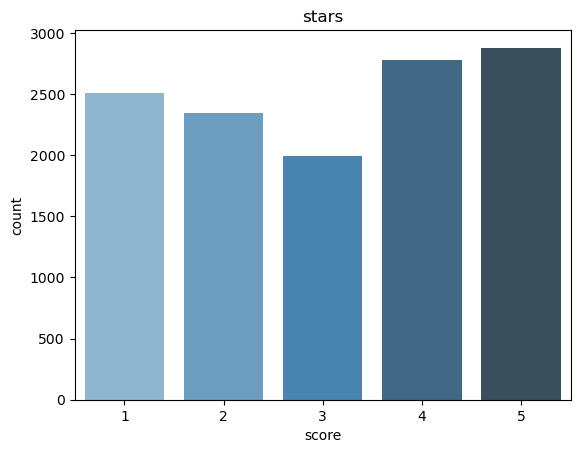

In [13]:
cplot = sns.countplot(x='score', data=reviews, palette="Blues_d")
cplot.set_title('stars')
cplot.set_ylabel('count')

Here, we will plot the distribution of the length of a review.


Text(0.5, 1.0, 'Text Length Distribution')

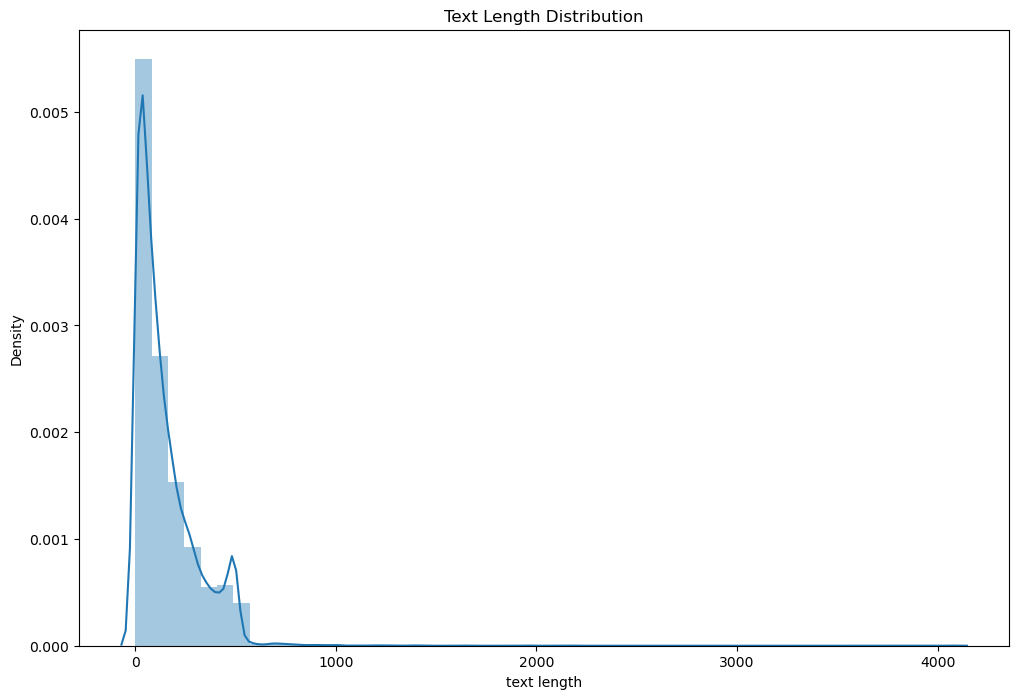

In [14]:
fig = plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

The average number of tokens in our reviews is 100. The longest review appears to be 4000 tokens. Tokens include words, stopwords (words used in high repetitions, like prepositions and pronouns), punctuation, and any other symbols or numbers.


## **Data Cleaning**


Next, we want to select only 'score' and 'content' columns for our analysis.  These two columns provide all the necessary information for the purpose of our analysis.


In [15]:
text = reviews[['score','content']]
text.head()

,score,content
0,1,I cannot open the app anymore
1,1,I have been begging for a refund from this app...
2,1,Very costly for the premium version (approx In...
3,1,"Used to keep me organized, but all the 2020 UP..."
4,1,Dan Birthday Oct 28


In the cells below, we are performing some text cleaning. We will do so by defining a function that can remove stopwords and punctuation, convert to lower case, and keep only English reviews. After, we will make a copy of our 'cleaned' data to apply our function to.


In [16]:
cachedStopWords = stopwords.words("english")

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]

In [17]:
cleaned_text = text.copy()
cleaned_text['content'] = text['content'].apply(remove_punc_stopword)

In [18]:
cleaned_text.head()

,score,content
0,1,"[cannot, open, app, anymore]"
1,1,"[begging, refund, app, month, nobody, replying]"
2,1,"[costly, premium, version, approx, indian, rup..."
3,1,"[used, keep, organized, 2020, updates, made, m..."
4,1,"[dan, birthday, oct, 28]"


Now, to generate some insight from the reviews, we will generate the *frequency count* and *word cloud* plots.


First, we will associate a 5-star reviews with a positive sentiment and 1-star reviews with a negative sentiment.

3-star reviews would be neutral, but for simplicity purposes, we will only attempt to predict the positive and negative sentiment. This is because our goal is to train a model to recognize positive or negative language, and 3-star reviews are likely to contain both.

In normal language, neutral sentiment would mean that we are not using any words with an associated emotion, whereas this is not the case for reviews. Rather, customers assigning 3-star ratings are likely to have enjoyed some aspects and not enjoyed the others. For this reason, including a 'neutral' category is likely to affect our model accuracy and will not be used in this project.


## **The Most Frequently Occuring Words in Negative Reviews**


The cells below, define a function and make a plot with 20 most frequently used words in the **negative** reviews.


In [23]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.content.reset_index(drop=True))).plot(20, cumulative=False)

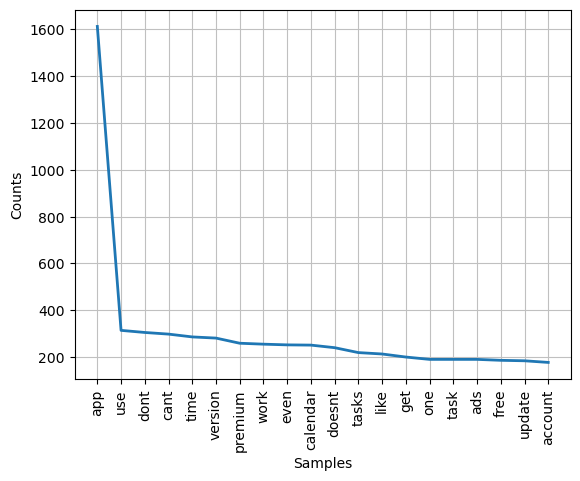

In [24]:
plot_Freq(cleaned_text[cleaned_text['score']==1])

The cells below, define a function and make a `WordCloud()` plot with most frequently used words in the **negative** reviews.


In [25]:
def reviewCloud(star):
    startext = ' '.join(text[text['score']==star]['content'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(startext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

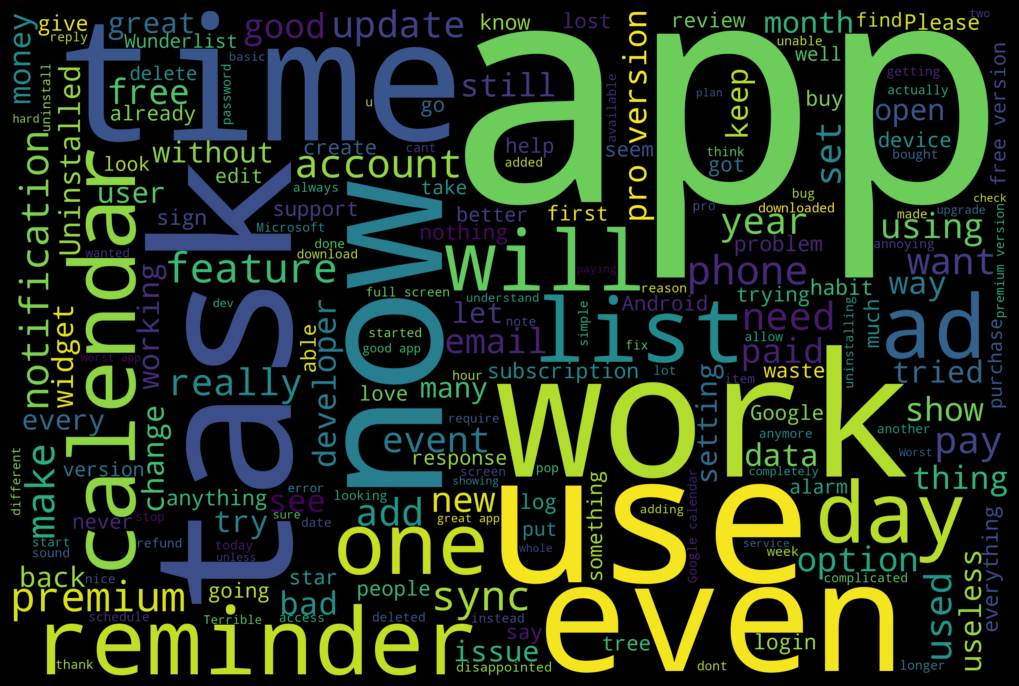

In [26]:
reviewCloud(1)

The *frequency count* and *word cloud* plots enable businesses to get to know their customers better. In our example,
the words such as 'place', 'food', and 'service' can provide some hints to why the reviewers gave such a low score to the business and what should be improved. From a business owner stand point, they will know that there is something about their 'food' and 'service' that the customers are not liking. In the next section, we will randomly select a business and see what insight a sentiment analysis can provide about this business.


## **A Random Application Sample Analysis**


To select a random application from our original reviews dataset, let's use the `tail()` function to view the last rows of our data.


In [27]:
rev.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner
12494,gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...,DAVOR SPASENOSKI,https://play-lh.googleusercontent.com/a-/AOh14...,Sooow good,5,0,4.5.4,2018-11-26 01:19:13,NaN,NaN,newest,com.appxy.planner


Let's use the index column to select a random application review. Here, we have selected the last index in a dataset, 12494.


In [28]:
rev.loc[12494,:]

reviewId                gp:AOqpTOFuJtS1McUdEZuLCnRn7k-UUcGNml7XqxKTSk2...
userName                                                 DAVOR SPASENOSKI
userImage               https://play-lh.googleusercontent.com/a-/AOh14...
content                                                        Sooow good
score                                                                   5
thumbsUpCount                                                           0
reviewCreatedVersion                                                4.5.4
at                                                    2018-11-26 01:19:13
replyContent                                                          NaN
repliedAt                                                             NaN
sortOrder                                                          newest
appId                                                   com.appxy.planner
Name: 12494, dtype: object

As we see, from a short review, this is some kind of a sushi restaurant.


Now, we want to select all the reviews associated with this app, by grouping them together by their *appId*.


In [29]:
app = rev[rev.appId==rev.loc[12494,:].appId]

In [30]:
app.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
11545,gp:AOqpTOEBV_2IHqxODanzu3MO_jWSnDSQrI3AuvKtnyM...,Sonia Savoree,https://play-lh.googleusercontent.com/a-/AOh14...,"Premium for dark mode? No thanks, I'll pass.",1,0,5.0.7,2020-10-23 06:39:38,NaN,NaN,newest,com.appxy.planner
11546,gp:AOqpTOH-N8j6aS578ryiP4ObsKhyCul13VDtuMwM-4B...,TerraZola.V sings,https://play-lh.googleusercontent.com/a-/AOh14...,So you just put tasks in alphabetical order in...,1,1,5.0.6,2020-10-17 23:50:49,NaN,NaN,newest,com.appxy.planner
11547,gp:AOqpTOEz7pwwitl-c40WzR_9aQ2XSjJWELOuaDlC3K5...,ㅁㅇ,https://play-lh.googleusercontent.com/-_JZW1OV...,"I subscribed for a year plan, and it's asking ...",1,1,5.0.6,2020-10-08 19:47:22,"Hi, would you please contact us at planner.a@a...",2020-10-09 06:15:37,newest,com.appxy.planner
11548,gp:AOqpTOHIfYv_3D8voDyj-R9_pbCbbPuoLk67kqptdob...,Saru J,https://play-lh.googleusercontent.com/a-/AOh14...,Worst app,1,0,NaN,2020-09-26 19:59:30,NaN,NaN,newest,com.appxy.planner
11549,gp:AOqpTOFf2TpBFL3ufIwwtzyUmG6iFezcPVZhsMWdWqY...,Ar. Smita Kulkarni,https://play-lh.googleusercontent.com/-DorUKgZ...,Very very very very very very bad or should I ...,1,0,NaN,2020-09-19 23:40:58,"Hi, would you please contact us at planner.a@a...",2020-09-21 06:27:42,newest,com.appxy.planner


First, we need to specify some words, that we want to extract from our reviews. Then, we will use *Count Vectorizer* function to vectorize these words and make an array. And last, we will count them up and plot them to display what do reviewers say about this app.


Here are some random words that we want to look for in our analysis.


In [78]:
selected_words = ['good', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible',
                  'worst', 'disappointed', 'hate']

We vectorize and transform them into an array.


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
selected_word_count = vectorizer.fit_transform(app["content"].values.astype("U"))

feature_names = vectorizer.get_feature_names_out()

In [81]:
word_count_array = selected_word_count.toarray()
x = word_count_array.shape
print(word_count_array)
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(950, 2412)


Our array is 050 columns by 2412 rows matrix.


Next, we extract our features by using the `get_feature_names()` function, convert them to pandas data frame, and add them together using the `sum()` function.


In [42]:
rest = pd.DataFrame(index=vectorizer.get_feature_names_out(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

Below, we are plotting the count of our words.


<Axes: >

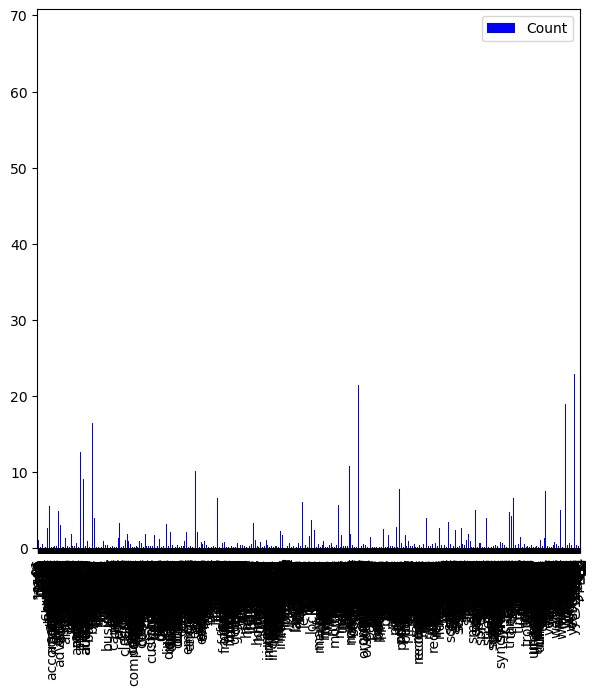

In [43]:
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

## **We will try it on another type**


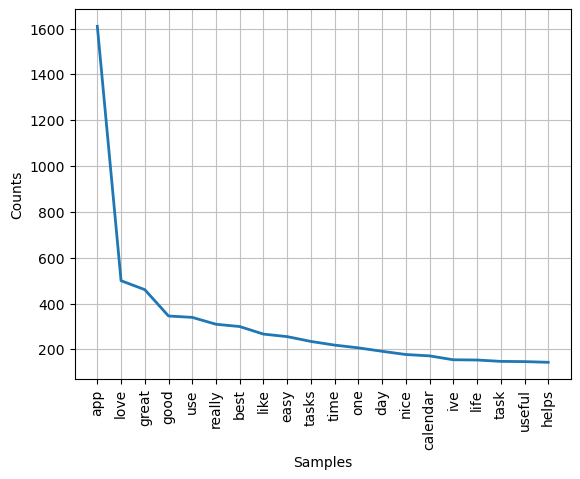

In [44]:
plot_Freq(cleaned_text[cleaned_text['score']==5])

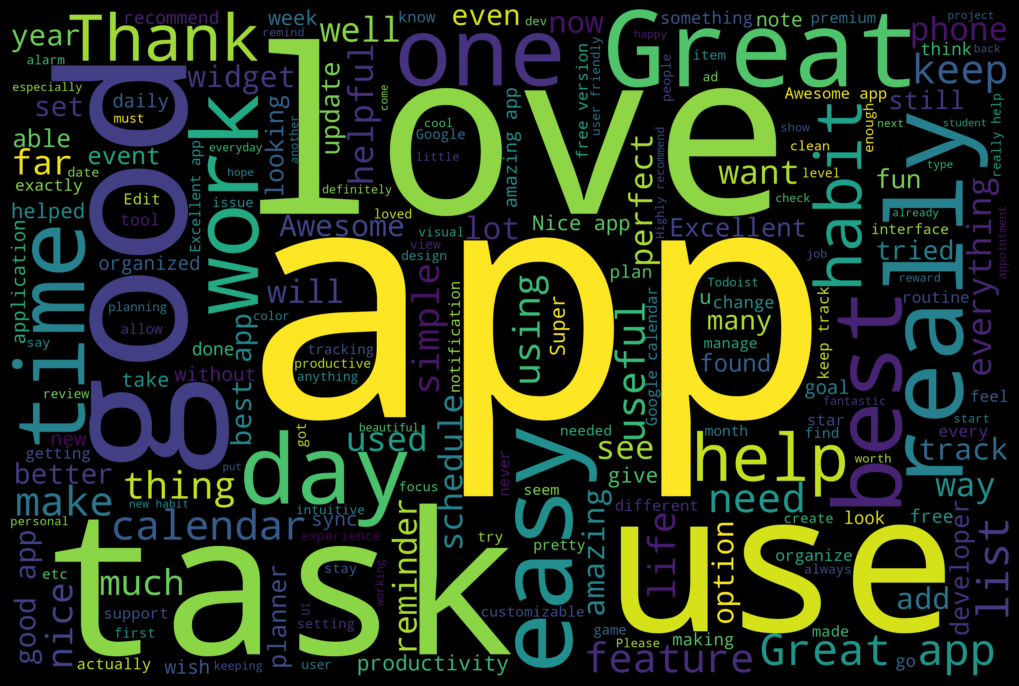

In [45]:
reviewCloud(5)

In [46]:
apps = ['update', 'reminder', 'feature', 'easy', 'application', 'track', 'useful']
vectorizer = CountVectorizer(vocabulary=apps, lowercase=False)
vietnamese_cuisine_count = vectorizer.fit_transform(app['content'].values.astype('U'))

apps_array = vietnamese_cuisine_count.toarray()

type_cuisine = pd.DataFrame(index=vectorizer.get_feature_names_out(),
data=apps_array.sum(axis=0)).rename(columns={0: 'Count'})

***


## **Modeling**


Next, we will build a model to classify our reviews into positive or negative.  For this, we will select only '1' and '5' stars reviews to train our model on. We will separate the dataset into x and y variables.


In [47]:
select_stars = text[(text['score']==1) | (text['score']==5)]

In [48]:
x = select_stars['content']
y = select_stars['score']

### **Using *CountVectorizer* to transform the data**

As mentioned in the **Introduction** section, before building a model, we need to transform our text into a matrix of token counts. We will use `CountVectorizer()` to perform this task. We will also print the dimensions of our matrix, after vectorization. And last, we will split our data into 80% training and 20% testing sets.


In [49]:
count_vec = CountVectorizer().fit(x)
x = count_vec.transform(x)

In [50]:
print("Shape of the sparse matrix: ", x.shape)

Shape of the sparse matrix:  (5385, 7052)


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### **Multinomial Naive Bayes Model**

In this classification problem, we will use the `MultinomialNB()` for our classification task. This classifier is suitable for classification with discrete features (in our case, word counts). It can also work with fractional counts, such as after *TD-IDF transform* vectorization.


In [52]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[448  55]
 [ 55 519]]
Score: 89.79
Classification Report:               precision    recall  f1-score   support

           1       0.89      0.89      0.89       503
           5       0.90      0.90      0.90       574

    accuracy                           0.90      1077
   macro avg       0.90      0.90      0.90      1077
weighted avg       0.90      0.90      0.90      1077



We are using *precision, recall*, and *F1* score for our model evaluation.  These are more appropriate performance metrics when dealing with the unbalanced data (our data is left-skewed, containing more '5' star reviews). As shown in this classification report, our model performs well on '1' and '5' star reviews, with 89% and 90% precision values respectively.


### **Using *Term Frequency–Inverse Document Frequency transformer(TF-IDF)* to transform the data**


Now, we will try an alternative way to tokenize our text, by using the `TfidfTransformer()` transformer.


In [53]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf,y, test_size=0.2, random_state=42)

mnb_tfidf = MultinomialNB()

mnb_tfidf.fit(x_tfidf_train,y_tfidf_train)
pred_mnb_tfidf = mnb_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_tfidf_test,pred_mnb_tfidf))
print("Score:",round(accuracy_score(y_tfidf_test,pred_mnb_tfidf)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,pred_mnb_tfidf))

Confusion Matrix for Multinomial Naive Bayes:
[[451  52]
 [ 58 516]]
Score: 89.79
Classification Report:               precision    recall  f1-score   support

           1       0.89      0.90      0.89       503
           5       0.91      0.90      0.90       574

    accuracy                           0.90      1077
   macro avg       0.90      0.90      0.90      1077
weighted avg       0.90      0.90      0.90      1077



The precision score has improved significantly for the '5' star reviews, increasing to 91%. However, the precision for '1' star reviews is the same.  *TF-IDF Vectorizer* does not make any significant improvement in our model performance. Although, it is more advanced way to vectorize the text data, in our case, it does not improve the overall precision, on the contrary, it lowers it.


## **Random Forest**


Here we are going to apply *Random Forest* or any other classifier of choice to see whether the model performance could be improved for both, '1' and '5' star reviews. Some of the possible models to use are: *Multilayer Perceptron, Gradient Boosting Classifier, XGBoost Classifier, Decision Tree, K Neighbor Classifier, Support Vector Machine*.


In [54]:
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[439  64]
 [ 84 490]]
Score: 86.26
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.87      0.86       503
           5       0.88      0.85      0.87       574

    accuracy                           0.86      1077
   macro avg       0.86      0.86      0.86      1077
weighted avg       0.86      0.86      0.86      1077



## **Predicting**


Now, we can test our `MulninomialNB()` model to see whether it can predict '1' and '5' star ratings.


First, let's try a **positive** review.


In [82]:
positive_review = text.loc[text['score'] == 5, 'content'].iloc[0]
print("Review:", positive_review)
print("Actual Rating: 5")
pr_t = count_vec.transform([positive_review])
predicted_rating = mnb.predict(pr_t)[0]
print("Predicted Rating:", predicted_rating)

Review: This app is awesome. I am currently using the free version and it had everything I need. It truly makes it easy for you to stai organized and not lose tracks of priorities.
Actual Rating: 5
Predicted Rating: 5


Now, let's try a **negative** review.


In [84]:
negative_review = text.loc[text['score'] == 1, 'content'].iloc[0]
print("Review:", negative_review)
print("Actual Rating: 1")
pr_t = count_vec.transform([negative_review])
predicted_rating = mnb.predict(pr_t)[0]
print("Predicted Rating:", predicted_rating)

Review: I cannot open the app anymore
Actual Rating: 1
Predicted Rating: 1


As we can see, the `MulninomialNB()` model, in both cases, has accurately predicted the review rating score.


## **Conclusion**


In this project, while exploring the Google Play Store Apps Reviews dataset, we have learned about text analysis techniques and how they can be used to extract some information from text.

We have also learned to apply the *Multinomial Naive Bayes* model to classify and predict positive and negative sentiments with more than 80% accuracy.
